Typically, one of your first steps that when you're doing data viz in `matplotlib` is to make a blank canvas to draw on.

This of course returns a `Figure` object and an `Axis` object.

Populating the interactive namespace from numpy and matplotlib


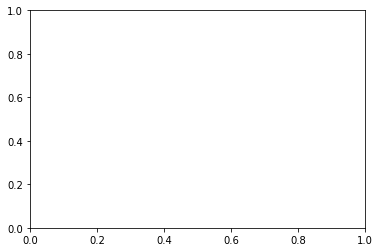

In [1]:
%pylab inline
fig, ax = plt.subplots()

And if you're interested in making multiple plots together in the same figure, you pass in `nRows` and `nCols` arguments. To instead make the second return argument an array of `Axis` objects.

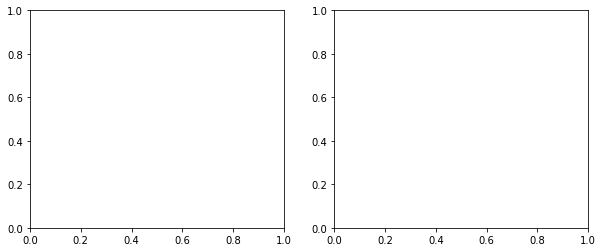

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

However, this can get unwieldy when dealing with a large number of rows and columns-- not only from an aesthetic standpoint, but also from a "How do I put my visualization into the cell I want?"

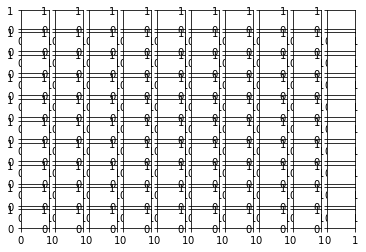

In [3]:
fig, axes = plt.subplots(10, 10)

## Our Data

We have a `.csv` on hand that looks at the distribution of where letters occur in popular English words. It's got a column for each letter and 15 rows of data.

In [4]:
import pandas as pd

df = pd.read_csv('../data/letterDists.csv')
df.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1405,1566,2533,1595,988,1198,825,1036,915,250,...,92,1442,3135,1323,499,377,728,1,98,44
1,3554,150,438,202,3739,91,83,1040,2577,4,...,64,2227,220,624,1914,182,208,282,238,1
2,2368,518,1223,793,1784,460,703,205,1618,70,...,51,2364,1737,1645,1006,469,257,127,259,93
3,1506,442,1139,1007,3003,429,776,558,1937,39,...,46,1618,1473,2138,762,338,258,32,192,112
4,1371,317,729,702,3565,206,477,699,2296,7,...,15,1708,1706,1611,705,158,147,22,498,65


## Iterating Through Each Figure

Conceptually, we want to simultaneously iterate through each column of data and through each of our axes making a plot for each step along the way.

Simultaneous iteration should set off the `zip` alarm in your head, and by using the `axes.flatten()` method, we don't have to go through the hastle of nested `for` loops to deal with a variable number of rows and columns in our figure.

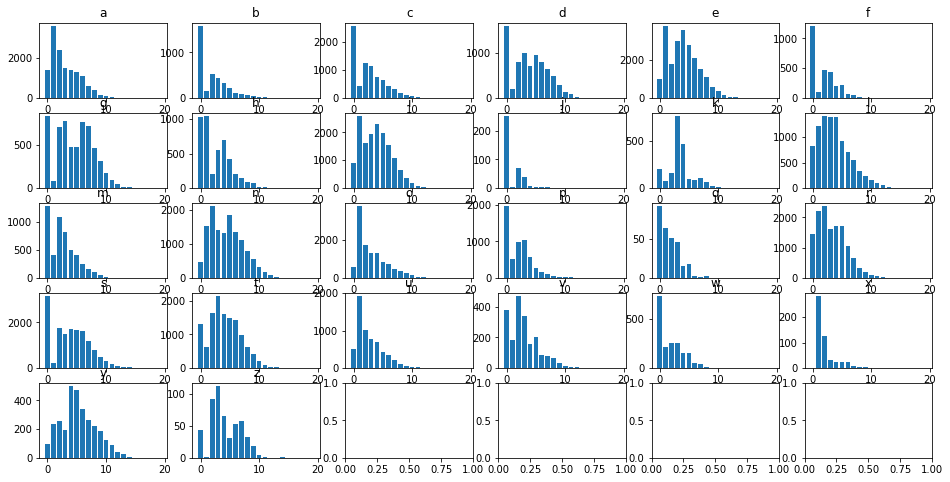

In [5]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))

for col, ax in zip(df.columns, axes.flatten()):
    ax.bar(df.index, df[col])
    ax.set_title(col)

## Spacing Out

But this is pretty cluttered.

Thankfully, we can use the `subplots_adjust` function to tune the layout of each subplot.

Specifically, we're going to modify the `wspace` and `hspace` arguments, [which are defined in the docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) as

> *the amount of (height/width) reserved for space between subplots, expressed as a fraction of the average axis (height/width)*

The size of the subplots themselves will scale to fill the other `n`% of the height/width, automatically.

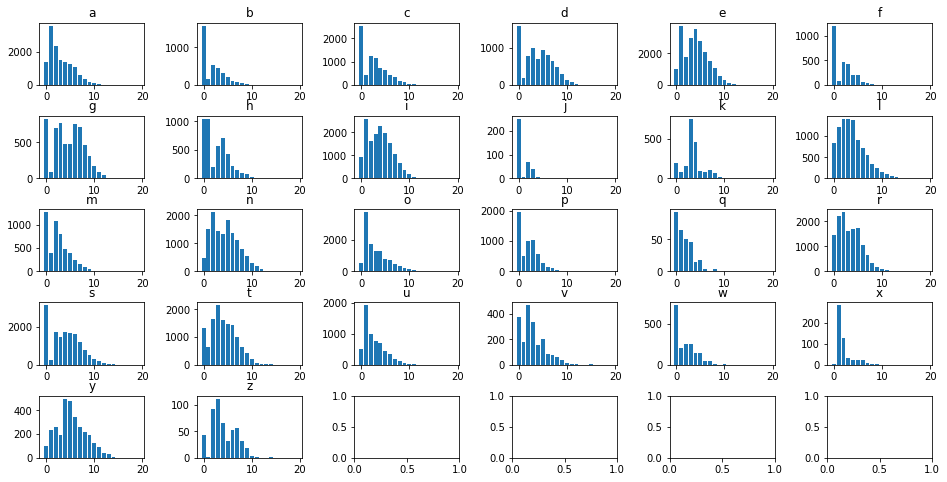

In [6]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))

for col, ax in zip(df.columns, axes.flatten()):
    ax.bar(df.index, df[col])
    ax.set_title(col)
    plt.subplots_adjust(wspace=.5, hspace=.5)

## Cleaning Up Remainder

Finally, we made a 5x6 figure because 26 doesn't divide evently into a 5x5 or a 4x6. However, as a result, those last 4 cells detract from the rest of the figures.

We can manually delete them using the `fig.delaxes()` function, and manually specifying what cells to delete.

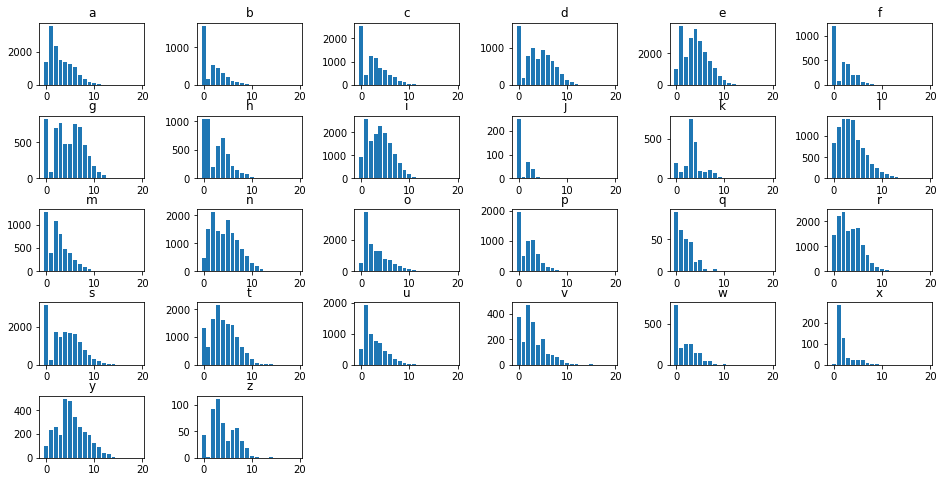

In [7]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))

for col, ax in zip(df.columns, axes.flatten()):
    ax.bar(df.index, df[col])
    ax.set_title(col)
    plt.subplots_adjust(wspace=.5, hspace=.5)
    
fig.delaxes(axes[4, 2])
fig.delaxes(axes[4, 3])
fig.delaxes(axes[4, 4])
fig.delaxes(axes[4, 5])

But this can be tedious and makes for bloated, repetitive code. Instead, consider the following trick that uses:

- The `enumerate()` function to figure out where the iteration left off
- The `else` statement after a `for` loop to delete each subplot in the rest of the figure

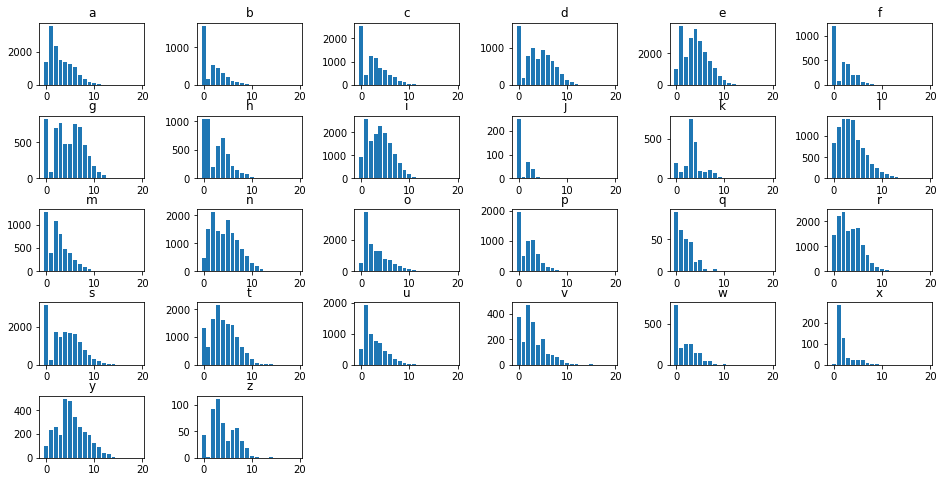

In [8]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))

for idx, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    ax.bar(df.index, df[col])
    ax.set_title(col)
    plt.subplots_adjust(wspace=.5, hspace=.5)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]